In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
# from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
fraud = pd.read_csv('C:/Users/Paresh/Downloads/Fraud_check.csv',index_col=0)

In [3]:
fraud.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO


In [4]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fraud=pd.get_dummies(fraud,columns=['Marital.Status','Urban'], drop_first=True)

In [5]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["Taxable.Income"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [6]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
fraud['Taxable.Income']= label_encoder.fit_transform(fraud['Taxable.Income']) 

In [7]:
fraud.head(25)

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Marital.Status_Single,Urban_YES
Undergrad,,,,,,
NO,0,50047,10,0,1,1
YES,0,134075,18,0,0,1
NO,0,160205,30,1,0,1
YES,0,193264,15,0,1,1
NO,0,27533,28,1,0,0
NO,0,116382,0,0,0,0
NO,0,80890,8,0,0,1
YES,0,131253,3,0,1,1
NO,0,102481,12,0,1,1


In [8]:
x=fraud.iloc[:,0:4]
y=fraud['Taxable.Income']

In [9]:
y

Undergrad
NO     0
YES    0
NO     0
YES    0
NO     0
      ..
YES    0
YES    0
NO     0
YES    0
NO     0
Name: Taxable.Income, Length: 600, dtype: int32

In [10]:
x

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married
Undergrad,,,,
NO,0,50047,10,0
YES,0,134075,18,0
NO,0,160205,30,1
YES,0,193264,15,0
NO,0,27533,28,1
...,...,...,...,...
YES,0,39492,7,0
YES,0,55369,2,0
NO,0,154058,0,0


In [11]:
fraud['Taxable.Income'].unique()

array([0, 1])

In [12]:
colnames = list(fraud.columns)
colnames

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES']

In [13]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=45)

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

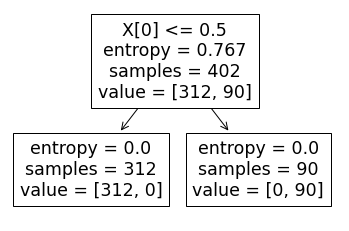

In [15]:
#PLot the decision tree
tree.plot_tree(model);


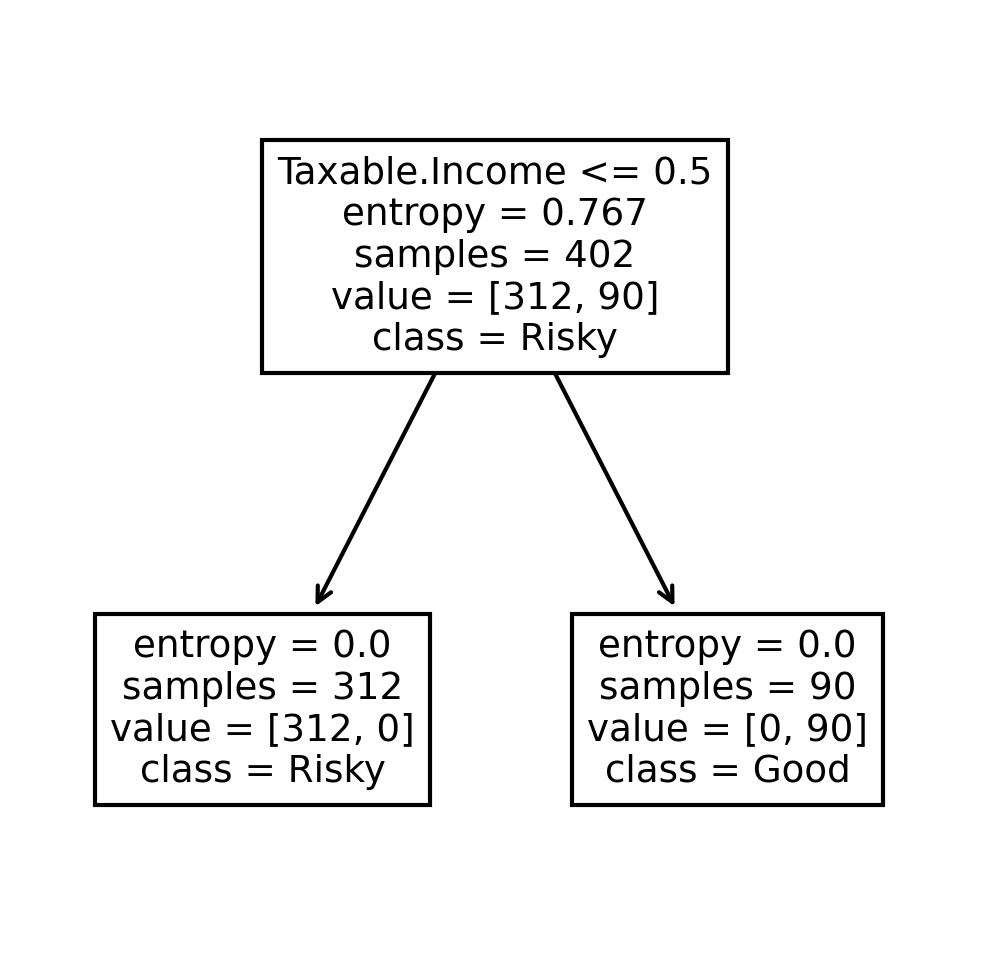

In [16]:
fn=['Taxable.Income','Undergrad','City.Population','Work.Experience']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = False);

In [17]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    164
1     34
dtype: int64

In [18]:
preds

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,164,0
1,0,34


In [20]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [22]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [23]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [24]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [25]:
array = fraud.values
X = array[:,0:5]
y = array[:,1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [27]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
pred=model.predict(X_test)

In [29]:
y

array([ 50047, 134075, 160205, 193264,  27533, 116382,  80890, 131253,
       102481, 155482, 102602,  94875, 148033,  86649,  57529, 107764,
        34551,  57194,  59269, 126953, 147222,  29106, 155342,  50495,
        28495, 124606, 169128,  28542, 128766,  41863, 117788, 147414,
        51911, 157251, 183767,  41117, 193995,  66912, 177575,  54981,
       199697,  91524,  51666,  50020,  98880, 183095, 137346,  34964,
        35480, 160195, 145804, 174042,  91828, 139143,  98207,  89965,
        69832,  70744, 158047, 102228,  91138,  86169, 147684,  95831,
       118261, 194738,  66985, 173986, 139642,  86896,  80904, 105680,
       108300, 174789, 182319,  50404, 129164, 118344, 143153, 140885,
        28184, 121608, 111068,  73963, 178083, 125155,  97520,  64075,
        63896, 176050, 101232,  73733, 114621, 137676, 122705, 121498,
        63622,  37849,  77053, 114350,  46444,  50490,  91488,  76318,
       174423,  46893,  58535,  52424, 120894, 178585,  32450, 164526,
      

In [30]:
model.score(X_test,y_test)

0.9998366662378156